# Data Analysis using Python
Problem Statement for analysis:<br>
To find out pricing stategie through comprehensive examination of-<br> 
**1. Property type**<br>
**2. Geographic demand**<br>
**3. Season**<br>  
> This study will dive into airbnb datset to extract meaningful insight,trends and suggest data driven strategies for optimizing both host offerings and guest experiences.

# Data Uploading

In [12]:
# Import python libraries
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

%matplotlib inline

In [13]:
def load_dataset(file_path):
    """
    Reads data file into a DataFrame and prints its shape.
    
    Parameters:
    file_path (str): The path to the data file.
    
    Returns:
    DataFrame: The loaded DataFrame.
    """
    df = pd.read_csv(file_path)
    return df


In [14]:
#read the dataset
df_cal=load_dataset('calendar.csv')
df_lis=load_dataset('listings.csv')
df_rev=load_dataset('reviews.csv')

In [15]:
#dispaly the data sample for top 5
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [16]:
#dispaly the data sample for top 5
df_lis.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [17]:
#dispaly the data sample for top 5
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [18]:
#let's see the data type and count of columns
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [19]:
#let's see the data type and count of columns
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [20]:
#let's see the data type and count of columns
df_lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

# Transformation

**Reason For Transformation** </br>
From the above info. for the different dataset we can see that 
Price in df_cal is text type which must be convereted to float for all the calculation.
simillarly Date in df_cal is text type which should also be converted to datetime for time range analysis. 

In [21]:
# Changing price in calender from object type to float
df_cal['price'] = df_cal['price'].str.replace("[$, ]", "").astype("float")

#converting the date column into datetime
df_cal['date'] = pd.to_datetime(df_cal['date'])

#creating a column for month of year
df_cal['month'] = df_cal['date'].dt.month
df_cal['month'] = df_cal['month'].apply(lambda x: calendar.month_abbr[x])

df_cal.head()


C:\Users\Rohit.Ojha\AppData\Local\Temp\ipykernel_11708\1555753799.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cal['price'] = df_cal['price'].str.replace("[$, ]", "").astype("float")


,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,Jan
1,241032,2016-01-05,t,85.0,Jan
2,241032,2016-01-06,f,NaN,Jan
3,241032,2016-01-07,f,NaN,Jan
4,241032,2016-01-08,f,NaN,Jan


In [22]:
# Changing price in listings from object type to float
df_lis['price'] = df_lis['price'].str.replace("[$, ]", "").astype("float")

C:\Users\Rohit.Ojha\AppData\Local\Temp\ipykernel_11708\3704842719.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_lis['price'] = df_lis['price'].str.replace("[$, ]", "").astype("float")


# Analyzing and Visualizing

How the price vary on seasons-

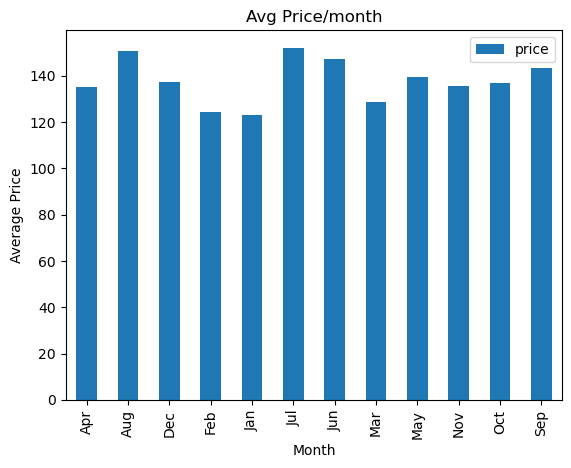

In [23]:
### price trend on seasons
mth_lis=df_cal.groupby('month')['price'].mean()

""" This will group the price on month.
    Input: Column for Group by Price Group by on Month
    Output:sum of price charged in respective months
    """
mth_lis.plot(kind="bar"); #visual type
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title("Avg Price/month")
plt.legend();
plt.savefig('9.png',bbox_inches='tight')

How price vary with location-

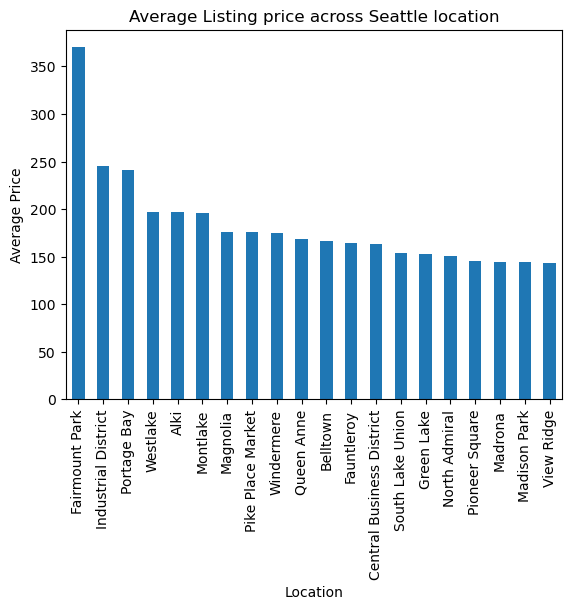

In [24]:
# price trend on location
mean_prc=df_lis.groupby('neighbourhood')['price'].mean()
mean_prc.nlargest(20).plot(kind="bar");
plt.title("Average Listing price across Seattle location");
plt.xlabel('Location');
plt.ylabel('Average Price');
plt.savefig('7.png',bbox_inches='tight')

How price vary with property type-

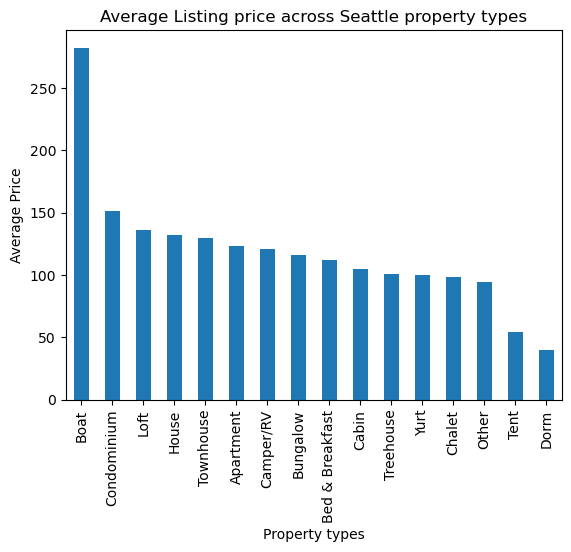

In [25]:
# price distribution on property type
mean_prc=df_lis.groupby('property_type')['price'].mean()
mean_prc.nlargest(20).plot(kind="bar");
plt.title("Average Listing price across Seattle property types");
plt.xlabel('Property types');
plt.ylabel('Average Price');
plt.savefig('7.png',bbox_inches='tight')

what are the factors related with price variation-

In [ ]:
# Heatmap for Correlation of factors 
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_lis.corr(), annot=True, fmt='.2f');
plt.savefig('4.png',bbox_inches='tight')

There are lots of column which are null and doesn't directly linked with price variation which can be seen in heat map, these column and data can be dropped.

In [ ]:
# Drop columns that are not required
col = ['summary','name','space','description','experiences_offered','neighborhood_overview','notes','transit',       
       'thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_about','host_thumbnail_url',
       'host_picture_url','street', 'neighbourhood_group_cleansed', 
       'square_feet', 'calendar_updated','requires_license', 'weekly_price', 'monthly_price', 
       'first_review','last_review','host_name','host_location','scrape_id','license','review_scores_rating' ,'review_scores_accuracy' 
       ,'review_scores_cleanliness','review_scores_checkin' ,'review_scores_communication' ,'review_scores_location','review_scores_value']

df_lis.drop(col, axis =1, inplace=True)

In [ ]:
# Heatmap for Correlation  
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_lis.corr(), annot=True, fmt='.2f');
plt.savefig('4.png',bbox_inches='tight')

# Conclusion:-

The examination of seasonal variations, area-specific pricing, and the influence of property type reveals clear patterns that hosts and guests alike can leverage. During peak travel seasons, higher demand typically drives prices upward, while off-peak periods see rates decrease, offering opportunities for more budget-conscious travelers. The location of a property plays an equally significant role, with urban centers and popular tourist destinations commanding higher prices, whereas more remote or less central locations may offer more affordable options. Additionally, property type influences pricing, with larger, unique, or luxury accommodations often priced at a premium due to their distinct features and guest appeal.